In [1]:
import pandas

In [2]:
users = pandas.read_csv("users.csv", dtype=str)
trans = pandas.read_csv("transactions.csv", dtype=str)


In [3]:
users.head()

,id,latitude,longitude
0,1,-6.081689,145.391881
1,2,-5.207083,145.7887
2,3,-5.826789,144.295861
3,4,-6.569828,146.726242
4,5,-9.443383,147.22005


In [4]:
trans.head()

,seller_id,buyer_id,Commodity
0,2965,2990,Copper
1,2966,2990,Aluminium
2,2966,2962,Zinc
3,2968,2990,Zinc
4,2968,4078,Aluminium


In [5]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [6]:
def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = users[users["id"] == row["seller_id"]].iloc[0]
        dest = users[users["id"] == row["buyer_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist

In [8]:
# apply distance calc
trans_dist = trans[:500].apply(calc_dist, axis=1)

(array([ 170.,  143.,   85.,   40.,   16.,    8.,    6.,    9.,    5.,
           8.,    4.,    2.,    0.,    0.,    2.,    0.,    0.,    0.,
           0.,    2.]),
 array([    0.        ,   346.66105722,   693.32211444,  1039.98317166,
         1386.64422888,  1733.3052861 ,  2079.96634332,  2426.62740054,
         2773.28845776,  3119.94951498,  3466.6105722 ,  3813.27162942,
         4159.93268664,  4506.59374386,  4853.25480108,  5199.91585831,
         5546.57691553,  5893.23797275,  6239.89902997,  6586.56008719,
         6933.22114441]),
 <a list of 20 Patch objects>)

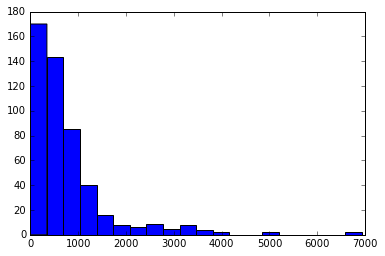

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# in km
plt.hist(trans_dist, bins=20)

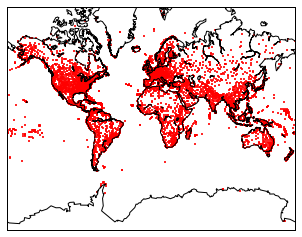

In [10]:
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(users["longitude"].astype(float)), list(users["latitude"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()

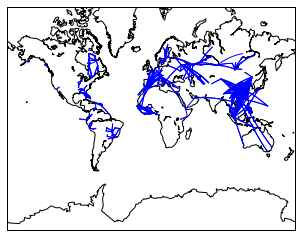

In [12]:
# Make a base map with a mercator projection.  Draw the coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()

# Iterate through the first few rows.
for name, row in trans[:1000].iterrows():
    try:
        seller = users[users["id"] == row["seller_id"]].iloc[0]
        buyer = users[users["id"] == row["buyer_id"]].iloc[0]
        # Skip long arcs for now
        if abs(float(seller["longitude"]) - float(buyer["longitude"])) < 90:
            # Draw a great circle between seller and buyer.
            m.drawgreatcircle(float(seller["longitude"]), float(seller["latitude"]), float(buyer["longitude"]), float(buyer["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
    
# Show the map.
plt.show()